<a href="https://colab.research.google.com/github/Meguazy/HACK_4DS/blob/main/notebooks_fra/neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/Meguazy/HACK_4DS.git

fatal: destination path 'HACK_4DS' already exists and is not an empty directory.


In [ ]:
%cd HACK_4DS

/content/HACK_4DS


In [ ]:
!git pull

Already up to date.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df_train = pd.read_csv("data/train_set.csv", sep=";", quotechar="\"", decimal=",")

In [ ]:
df_train[["application_ID", "province", "juridical_form", "industry_sector", "region", "geo_area"]] = df_train[["application_ID", "province", "juridical_form", "industry_sector", "region", "geo_area"]].astype(str)

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
external_score_ver03_dictionary = {
    "MISSING":None,
    "A":14,
    "B":13,
    "C":12,
    "D":11,
    "E":10,
    "F":9,
    "G":8,
    "H":7,
    "I":6,
    "L":5,
    "M":4,
    "N":3,
    "O":2,
    "P":1
}

df_train = df_train.replace({"external_score_ver03": external_score_ver03_dictionary})

In [ ]:
# get the unique values from the two columns
unique = np.unique(df_train[["application_ID", "province", "juridical_form", "industry_sector", "region", "geo_area"]])
# get the factors
factors = np.arange(len(unique))
# map the values to the corresponding factor
df_train[["application_ID", "province", "juridical_form", "industry_sector", "region", "geo_area"]] = df_train[["application_ID", "province", "juridical_form", "industry_sector", "region", "geo_area"]].replace(unique, factors)

In [ ]:
df_train['decision_date'] = pd.to_datetime(df_train['decision_date'])
df_train['decision_month'] = df_train['decision_date'].dt.month.astype(int)

In [ ]:
df_train.head(10)

,application_ID,decision_date,company_ID,external_score_ver01,external_score_ver02,late_payment_score,external_score_late_payment_integrated,external_score_moderate,external_score_adverse,external_score_ver03,age,province,juridical_form,industry_sector,gross_margin_ratio,core_income_ratio,cash_asset_ratio,consolidated_liabilities_ratio,tangible_assets_ratio,revenues,cr_available,region,geo_area,last_statement_age,overrun_freq_a_revoca_autoliquidanti,avg_tension_a_revoca_autoliquidanti,std_tension_a_revoca_autoliquidanti,max_tension_a_revoca_autoliquidanti,last_tension_a_revoca_autoliquidanti,avg_rel_used_a_revoca_autoliquidanti,std_rel_used_a_revoca_autoliquidanti,max_rel_used_a_revoca_autoliquidanti,last_rel_used_a_revoca_autoliquidanti,overrun_freq_a_scadenza,avg_rel_used_a_scadenza,std_rel_used_a_scadenza,max_rel_used_a_scadenza,last_rel_used_a_scadenza,avg_count_enti_affidanti,std_count_enti_affidanti,max_count_enti_affidanti,last_count_enti_affidanti,avg_count_numero_prima_info,std_count_numero_prima_info,max_count_numero_prima_info,last_count_numero_prima_info,days_to_default,target,decision_month
0,25457,2021-11-30,7.256588e+09,10,3,NaN,NaN,NaN,NaN,NaN,15,139,126,131,0.464637,0.012593,0.000000,0.416002,1.000000,410.0,True,132,63,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.25,0.176975,0.002112,0.179073,0.172032,1.00,0.000000,1,1,0.000000,0.000000,0,0,522,1,11
1,2289,2020-10-06,6.178307e+09,7,3,NaN,NaN,NaN,NaN,7.0,5,25,119,41,0.372340,0.115385,0.235955,0.484043,1.000000,208.0,True,130,63,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.151754,0.006806,0.164755,0.146385,1.00,0.000000,1,1,2.000000,0.000000,2,2,1498,0,10
2,573,2020-02-11,7.692855e+09,7,3,NaN,NaN,NaN,NaN,NaN,5,66,126,42,0.270000,0.006369,0.359375,0.125000,0.375000,471.0,False,110,134,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,1.00,0.000000,1,1,1.000000,0.000000,1,1,779,1,2
3,27385,2022-01-18,5.752242e+09,8,2,NaN,NaN,NaN,NaN,NaN,6,116,126,131,0.419929,0.152174,0.136150,0.765125,0.058824,598.0,True,72,39,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.025084,0.026199,0.050167,0.050167,1.00,0.000000,1,1,0.500000,0.522233,1,0,1498,0,1
4,20713,2021-09-16,7.533507e+09,4,1,NaN,NaN,NaN,NaN,NaN,5,97,126,131,0.526316,0.083333,0.233333,0.197368,0.750000,108.0,False,158,90,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0,0,0.000000,0.000000,0,0,1498,0,9
5,18543,2022-05-12,8.474428e+09,6,1,NaN,NaN,NaN,NaN,12.0,2,78,126,144,0.673177,0.026609,0.192248,0.252604,0.504065,2073.0,True,74,91,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.25,0.060680,0.037222,0.146051,0.146051,2.25,0.452267,3,3,2.916667,0.668558,4,1,1498,0,5
6,6283,2020-12-17,7.914332e+09,7,3,NaN,NaN,NaN,NaN,10.0,3,120,119,131,1.666667,0.017544,0.615385,0.277778,0.000000,57.0,False,38,134,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0,0,0.000000,0.000000,0,0,1498,0,12
7,4345,2020-11-05,3.216374e+09,6,1,NaN,NaN,NaN,NaN,NaN,9,138,126,148,0.307391,0.010648,0.080271,0.157611,0.843066,12209.0,True,109,91,3,0.000000,0.458545,0.248584,0.790275,0.202147,0.027610,0.013843,0.045343,0.012444,0.00,0.020232,0.020025,0.040953,0.037795,6.00,0.000000,6,6,0.250000,0.621582,2,2,1007,1,11
8,11321,2021-04-14,4.534846e+09,10,3,NaN,NaN,NaN,NaN,NaN,2,29,126,41,0.457291,0.068892,0.000000,0.369089,1.000000,584.0,True,10,134,2,0.083333,12637.000000,43775.537193,151643.000000,1.000000,0.002856,0.009886,0.034247,0.034247,0.00,0.094279,0.000436,0.095017,0.095017,1.00,0.000000,1,1,1.000000,0.000000,1,1,752,1,4
9,10984,2021-04-13,5.199648e+09,7,2,NaN,NaN,NaN,NaN,8.0,12,108,128,44,0.221461,-0.045290,0.051724,0.081050,0.715017

In [ ]:
df_train.head(45)

In [ ]:
trained_dropped = df_train.drop(columns=["application_ID", "company_ID", "core_income_ratio", "geo_area", "region", "juridical_form", "industry_sector", "province", "cr_available", "days_to_default", "std_tension_a_revoca_autoliquidanti", "avg_tension_a_revoca_autoliquidanti", "last_tension_a_revoca_autoliquidanti", "last_rel_used_a_revoca_autoliquidanti", "avg_rel_used_a_revoca_autoliquidanti", "max_rel_used_a_revoca_autoliquidanti", "avg_rel_used_a_scadenza", "last_rel_used_a_scadenza", "max_rel_used_a_scadenza", "avg_count_enti_affidanti", "last_count_enti_affidanti", "max_count_enti_affidanti", "std_count_numero_prima_info", "last_count_numero_prima_info", "avg_count_numero_prima_info"])

In [ ]:
aa = trained_dropped[['late_payment_score', 'external_score_late_payment_integrated', 'external_score_moderate', 'external_score_adverse', 'external_score_ver03']].interpolate(method='linear', limit_direction='forward', axis=0)

In [ ]:
aa.head(20)

,late_payment_score,external_score_late_payment_integrated,external_score_moderate,external_score_adverse,external_score_ver03
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,7.000000
2,NaN,NaN,NaN,NaN,8.250000
3,NaN,NaN,NaN,NaN,9.500000
4,NaN,NaN,NaN,NaN,10.750000
5,NaN,NaN,NaN,NaN,12.000000
6,NaN,NaN,NaN,NaN,10.000000
7,NaN,NaN,NaN,NaN,9.333333
8,NaN,NaN,NaN,NaN,8.666667
9,NaN,NaN,NaN,NaN,8.000000


<ipython-input-166-ff8c903e55fb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = trained_dropped.corr()


<Axes: >

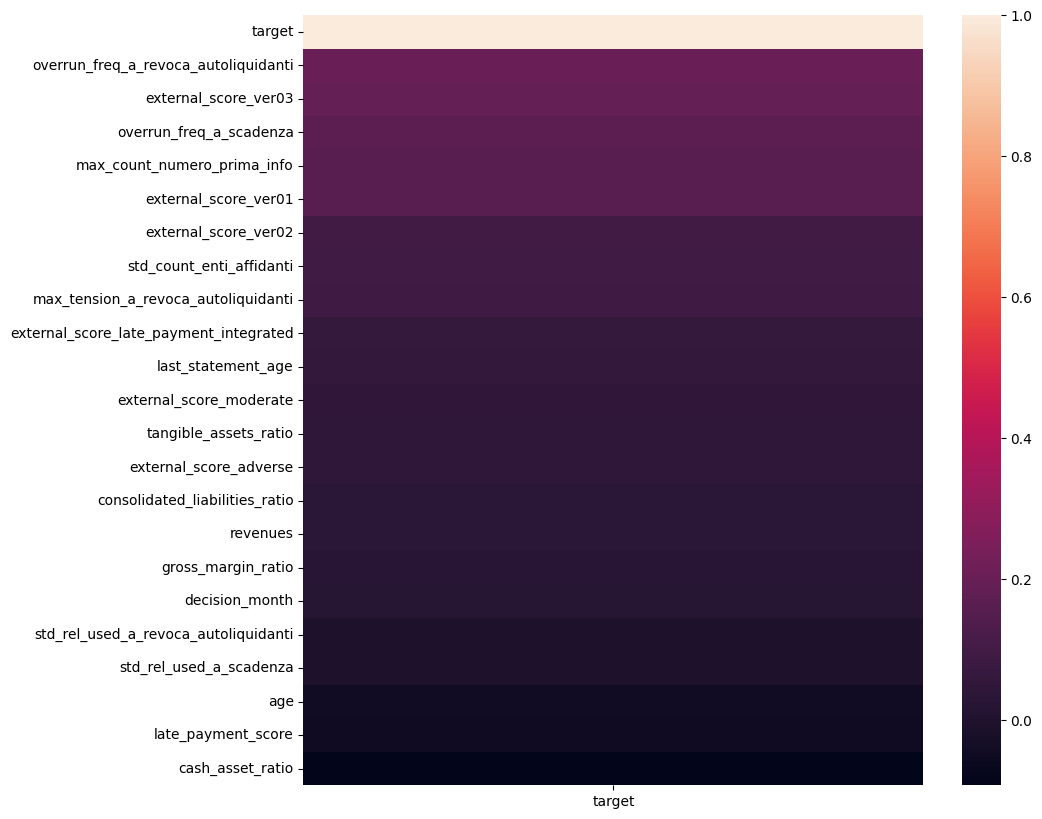

In [ ]:
corr = trained_dropped.corr()
x = corr[['target']]
plt.figure(figsize=(10,10))
sns.heatmap(x.sort_values("target", ascending=False), xticklabels=True, yticklabels=True)

In [ ]:
print(x.sort_values("target", ascending=False))

                                          target
target                                  1.000000
overrun_freq_a_revoca_autoliquidanti    0.205560
external_score_ver03                    0.190086
overrun_freq_a_scadenza                 0.169124
max_count_numero_prima_info             0.162334
external_score_ver01                    0.155252
external_score_ver02                    0.097461
std_count_enti_affidanti                0.093464
max_tension_a_revoca_autoliquidanti     0.088023
external_score_late_payment_integrated  0.057508
last_statement_age                      0.053600
external_score_moderate                 0.047445
tangible_assets_ratio                   0.041488
external_score_adverse                  0.040325
consolidated_liabilities_ratio          0.027987
revenues                                0.027478
gross_margin_ratio                      0.025207
decision_month                          0.021813
std_rel_used_a_revoca_autoliquidanti   -0.007549
std_rel_used_a_scade

In [ ]:
trained_dropped.head(20)

,decision_date,external_score_ver01,external_score_ver02,late_payment_score,external_score_late_payment_integrated,external_score_moderate,external_score_adverse,external_score_ver03,age,gross_margin_ratio,cash_asset_ratio,consolidated_liabilities_ratio,tangible_assets_ratio,revenues,last_statement_age,overrun_freq_a_revoca_autoliquidanti,max_tension_a_revoca_autoliquidanti,std_rel_used_a_revoca_autoliquidanti,overrun_freq_a_scadenza,std_rel_used_a_scadenza,std_count_enti_affidanti,max_count_numero_prima_info,target,decision_month
0,2021-11-30,10,3,NaN,NaN,NaN,NaN,NaN,15,0.464637,0.000000,0.416002,1.000000,410.0,2,0.000000,0.000000,0.000000,0.25,2.111932e-03,0.000000,0,1,11
1,2020-10-06,7,3,NaN,NaN,NaN,NaN,7.000000,5,0.372340,0.235955,0.484043,1.000000,208.0,3,0.000000,0.000000,0.000000,0.00,6.806286e-03,0.000000,2,0,10
2,2020-02-11,7,3,NaN,NaN,NaN,NaN,8.250000,5,0.270000,0.359375,0.125000,0.375000,471.0,2,0.000000,0.000000,0.000000,0.00,0.000000e+00,0.000000,1,1,2
3,2022-01-18,8,2,NaN,NaN,NaN,NaN,9.500000,6,0.419929,0.136150,0.765125,0.058824,598.0,3,0.000000,0.000000,0.000000,0.00,2.619898e-02,0.000000,1,0,1
4,2021-09-16,4,1,NaN,NaN,NaN,NaN,10.750000,5,0.526316,0.233333,0.197368,0.750000,108.0,2,0.000000,0.000000,0.000000,0.00,0.000000e+00,0.000000,0,0,9
5,2022-05-12,6,1,NaN,NaN,NaN,NaN,12.000000,2,0.673177,0.192248,0.252604,0.504065,2073.0,1,0.000000,0.000000,0.000000,0.25,3.722236e-02,0.452267,4,0,5
6,2020-12-17,7,3,NaN,NaN,NaN,NaN,10.000000,3,1.666667,0.615385,0.277778,0.000000,57.0,2,0.000000,0.000000,0.000000,0.00,0.000000e+00,0.000000,0,0,12
7,2020-11-05,6,1,NaN,NaN,NaN,NaN,9.333333,9,0.307391,0.080271,0.157611,0.843066,12209.0,3,0.000000,0.790275,0.013843,0.00,2.002530e-02,0.000000,2,1,11
8,2021-04-14,10,3,NaN,NaN,NaN,NaN,8.666667,2,0.457291,0.000000,0.369089,1.000000,584.0,2,0.083333,151643.000000,0.009886,0.00,4.360371e-04,0.000000,1,1,4
9,2021-04-13,7,2,NaN,NaN,NaN,NaN,8.000000,12,0.221461,0.051724,0.081050,0.715017,552.0,3,0.000000,0.000000,0.000000,0.00,0.000000e+00,0.000000,0,0,4


In [ ]:
# Counting NaN values in all columns
nan_count = trained_dropped.isna().sum()

print(nan_count)

In [ ]:
train_dropped_cols = trained_dropped.drop(["late_payment_score", "external_score_late_payment_integrated", "external_score_moderate", "external_score_adverse", "province"], axis=1)
train_dropped_rows = trained_dropped.dropna(axis=0)

In [ ]:
df_pca = pd.read_csv("data/pca_dropped.csv", index_col=False)

In [ ]:
df_pca.head(10)

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,target
0,0,-0.927900,-1.031397,1.232668,-1.385582,0.365556,-0.833498,-0.379105,1.235146,-0.397577,-0.104046,-0.652859,0.509002,-0.400694,1
1,1,-0.291559,-1.438432,-0.091433,0.068247,-0.219611,0.582989,0.175772,0.906724,0.003847,-0.636541,0.137123,0.531271,-0.335725,0
2,2,-0.382030,-1.725135,-0.403738,0.788630,-0.380722,0.604955,-0.445112,-1.246649,0.033274,-0.168543,-0.316494,0.679774,-0.009266,1
3,3,-0.134068,-0.993284,-0.111947,2.105197,-0.908539,-0.011098,0.462913,-0.880258,-0.041442,-1.022167,-0.749733,-1.237315,-0.283411,0
4,4,0.660255,-0.563257,-1.165842,-0.154215,0.017037,-0.479759,0.035812,-0.318406,-0.111523,1.196868,-0.226981,-0.128638,0.567926,0
5,5,0.055075,1.326642,-0.035563,-0.443319,0.085667,1.598574,0.368560,-0.700700,0.526484,0.664782,-0.937746,-0.488699,-0.186894,0
6,6,-0.007934,-2.195325,-1.425890,-0.902444,0.403904,1.024714,1.808377,-1.464311,0.882898,1.802944,-2.240043,0.275106,0.051541,0
7,7,0.319415,0.904108,-0.040015,0.396586,-0.509674,0.277733,-1.233612,-0.006949,-0.142039,1.148436,0.042417,0.862483,1.680068,1
8,8,-1.441056,-1.802450,1.974374,-0.256990,0.259399,0.300253,0.992284,-0.215918,0.678023,0.259253,3.478196,-0.301409,0.502016,1
9,9,-0.313744,-1.267128,0.263086,1.245763,-0.930900,-0.633269,-1.410444,-0.070461,-0.397712,0.586097,0.179835,0.057084,0.163471,0


In [ ]:
df_dropped = pd.read_csv("data/dropped.csv", index_col=False)

In [ ]:
!pip install imbalanced-learn

In [ ]:
df_dropped

,Unnamed: 0,decision_date,external_score_ver01,external_score_ver02,late_payment_score,external_score_late_payment_integrated,external_score_moderate,external_score_adverse,external_score_ver03,age,...,last_statement_age,overrun_freq_a_revoca_autoliquidanti,max_tension_a_revoca_autoliquidanti,std_rel_used_a_revoca_autoliquidanti,overrun_freq_a_scadenza,std_rel_used_a_scadenza,std_count_enti_affidanti,max_count_numero_prima_info,target,decision_month
0,0,2021-11-30,10,3,9.0,6.0,6.0,6.0,9.0,15,...,2,0.000000,0.000000,0.000000,0.25,0.002112,0.000000,0,1,11
1,1,2020-10-06,7,3,9.0,6.0,6.0,6.0,7.0,5,...,3,0.000000,0.000000,0.000000,0.00,0.006806,0.000000,2,0,10
2,2,2020-02-11,7,3,9.0,6.0,6.0,6.0,9.0,5,...,2,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,1,1,2
3,3,2022-01-18,8,2,9.0,6.0,6.0,6.0,9.0,6,...,3,0.000000,0.000000,0.000000,0.00,0.026199,0.000000,1,0,1
4,4,2021-09-16,4,1,9.0,6.0,6.0,6.0,9.0,5,...,2,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32027,32027,2021-03-12,8,1,9.0,6.0,6.0,6.0,10.0,7,...,2,0.333333,0.323472,0.067162,0.00,0.041954,1.311372,6,1,3
32028,32028,2021-05-06,5,1,9.0,6.0,6.0,6.0,5.0,5,...,2,0.666667,151643.000000,0.003082,0.00,0.001729,0.900337,4,0,5
32029,32029,2021-08-11,5,1,9.0,6.0,6.0,6.0,10.0,4,...,1,0.166667,0.606986,0.005085,0.00,0.026991,0.000000,1,0,8
32030,32030,2022-06-07,7,1,9.0,6.0,6.0,6.0,9.0,6,...,2,0.250000,1.000674,0.015711,0.00,0.000959,0.492366,0,1,6


In [ ]:
train_columns = ['external_score_ver01',
       'external_score_ver02', 'late_payment_score',
       'external_score_late_payment_integrated', 'external_score_moderate',
       'external_score_adverse', 'external_score_ver03', 'age',
       'gross_margin_ratio', 'cash_asset_ratio',
       'consolidated_liabilities_ratio', 'tangible_assets_ratio', 'revenues',
       'last_statement_age', 'overrun_freq_a_revoca_autoliquidanti',
       'max_tension_a_revoca_autoliquidanti',
       'std_rel_used_a_revoca_autoliquidanti', 'overrun_freq_a_scadenza',
       'std_rel_used_a_scadenza', 'std_count_enti_affidanti',
       'max_count_numero_prima_info', 'decision_month']

In [ ]:
from sklearn.model_selection import train_test_split

x = df_dropped[train_columns]
y = df_dropped['target']

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=0)
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [ ]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
mod = Sequential([
    Flatten(input_shape = (22,)),
    Dense(88, activation='relu'),
    Dropout(0.3),
    Dense(88, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid'),
])

mod.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy', f1_m])
hist = mod.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs = 50, batch_size = 40)

Epoch 1/50
641/641 [==============================] - 5s 5ms/step - loss: 0.4909 - accuracy: 0.7860 - f1_m: 0.1546 - val_loss: 0.4642 - val_accuracy: 0.7924 - val_f1_m: 0.1462
Epoch 2/50
641/641 [==============================] - 2s 3ms/step - loss: 0.4731 - accuracy: 0.7941 - f1_m: 0.1978 - val_loss: 0.4647 - val_accuracy: 0.7963 - val_f1_m: 0.2096
Epoch 3/50
641/641 [==============================] - 2s 4ms/step - loss: 0.4678 - accuracy: 0.7954 - f1_m: 0.2035 - val_loss: 0.4571 - val_accuracy: 0.7948 - val_f1_m: 0.2074
Epoch 4/50
641/641 [==============================] - 2s 3ms/step - loss: 0.4667 - accuracy: 0.7956 - f1_m: 0.2143 - val_loss: 0.4545 - val_accuracy: 0.7955 - val_f1_m: 0.2016
Epoch 5/50
641/641 [==============================] - 2s 3ms/step - loss: 0.4635 - accuracy: 0.7977 - f1_m: 0.2316 - val_loss: 0.4562 - val_accuracy: 0.7937 - val_f1_m: 0.1491
Epoch 6/50
641/641 [==============================] - 2s 3ms/step - loss: 0.4608 - accuracy: 0.7984 - f1_m: 0.2315 - val

[]

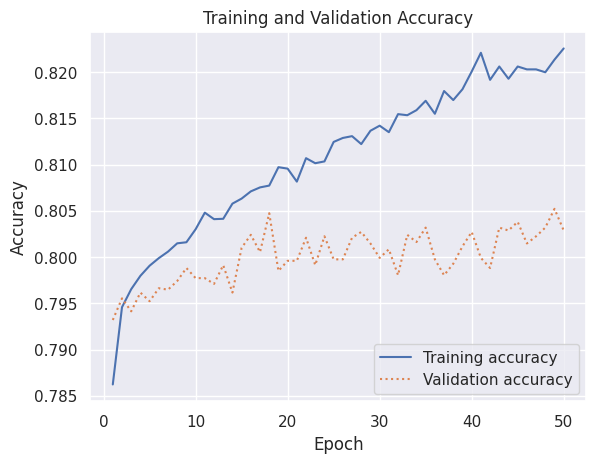

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

201/201 [==============================] - 1s 2ms/step


Text(109.44999999999997, 0.5, 'Actual label')

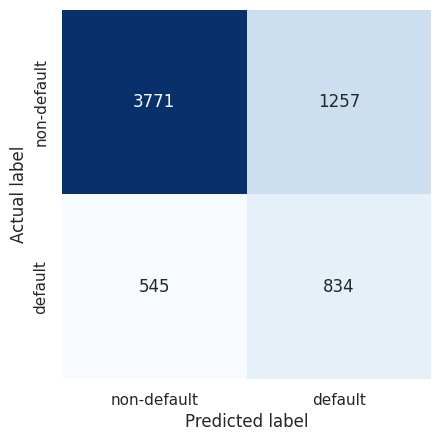

In [ ]:
from sklearn.metrics import confusion_matrix

y_predicted = mod.predict(X_test_scaled) > 0.23
mat = confusion_matrix(y_test, y_predicted)
labels = ['non-default', 'default']

sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [ ]:
from sklearn.metrics import f1_score
n = 0
for i in range(0,1000):
  n = n + 0.01
  y_predicted = mod.predict(X_test_scaled) > n
  print(n)
  print(f1_score(y_predicted, y_test))

201/201 [==============================] - 0s 1ms/step
0.01
0.35579654014975476
201/201 [==============================] - 0s 1ms/step
0.02
0.35782913528953514
201/201 [==============================] - 0s 2ms/step
0.03
0.3600209314495029
201/201 [==============================] - 0s 2ms/step
0.04
0.363251817580965
201/201 [==============================] - 0s 2ms/step
0.05
0.36810310108739425
201/201 [==============================] - 0s 2ms/step
0.060000000000000005
0.37315875613747956
201/201 [==============================] - 0s 1ms/step
0.07
0.37725381414701803
201/201 [==============================] - 0s 1ms/step
0.08
0.3832742735648476
201/201 [==============================] - 0s 1ms/step
0.09
0.38802499636680715
201/201 [==============================] - 0s 1ms/step
0.09999999999999999
0.39485107019907195
201/201 [==============================] - 0s 2ms/step
0.10999999999999999
0.4017278617710583
201/201 [==============================] - 0s 2ms/step
0.11999999999999998
0.40

KeyboardInterrupt: 

In [ ]:
print(y_predicted)

[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]
